# Формирование модели монетизации

## Презентация

ссылка: https://drive.google.com/file/d/1y3NtLFYRj9jB9WIjDBY461u_s2Z1921i/view?usp=sharing

Многие игры зарабатывают с помощью рекламы. И все они сталкиваются с противоречием:

- Пользователь разозлится и уйдёт, если начать показывать ему рекламу раньше, чем игра его затянет.
- Но  чем позже создатели игры включат рекламу, тем меньше они заработают.

В нашем исследовании мы помогаем продакт-менеджеру игрового приложения "Космические братья" выбрать оптимальное время для запуска рекламы. Зная расходы на продвижение игры, он может рассчитать её окупаемость при разных сценариях.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

Нам предоставлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников


__Цель исследования__ - сформировать модель монетизации игрового приложения.
 
__Задачи для достижения цели:__

1. Загрузка, осмотр и предобработка данных.
2. Исследовательский анализ данных.
3. Анализ влияние событий на совершение целевого события - перехода на экран выбора постройки. 
4. Проверка статистических гипотез.

__1. Загрузка, осмотр и предобработка данных__

- Проведем первичный осмотр данных, определим типы данных, проверим таблицы на наличие пропусков и дубликатов.
- Определим возможные причины появления пропусков и необходимость их удаления/замены.
- Определим возможные причины появления дубликатов, удалим их.
- Переименуем столбцы при необходимости.
- Приведем данные к соответствующим типам.
- Создадим столбец с датой события в таблице game_actions.
- Объединим таблицы game_actions и user_source.


__2. Исследовательский анализ данных__  

- Подтвердим период, за который нам предоставленны данные. 
- Определим количество активных игроков каждый день. Построим гистограмму динамики.
- Посчитаем, сколько пользователей совершали каждое из событий игры. Отсортируем события по числу пользователей.
- Определим среднее количество событий за каждый день. Определим количество построек в день/среднее количество построек в день. 
-  Посчитаем медианное, среднее и максимальное значение построек в день на каждого пользователя.
-  Рассмотрим динамику активности игроков по типам объектов.


__3. Анализ влияния событий на совершение целевого события__

- Сформируем профили пользователей, рассчитаем длительность прохождения уровней и способ прохождения.
- Посмотрим за какое время в среднем игроки завершают первый уровень.  Посмотрим количество событий и построек, включая проект, а также длительность прохождения уровня для каждой категории игроков. 
- Определим количество игроков, завершивших уровень с помощью завершения проекта или победы над соперником.
- Определим  количество построек и построим гистрограмму распределения построенных объектов для всех игроков, прошедших уровень, и для продолжающих игроков.
- Посмотрим, через какие каналы привлечены игроки. Посмотрим, есть ли типичные поведенческие паттерны в прохождении уровня у пользователя из разных источников.
- Посчитаем CAC каждого игрока и суммарные затраты на рекламу за каждый день.
- Посчитаем возможные доходы от игровой активности при стоимости одного клика по рекламе - 7 центов (0.07).
   

__4. Проверим статистические гипотезы__


1. Нулевая гипотеза: Статистически значимых различий между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, нет.
   Альтернативная гипотеза: Статистически значимые различия между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, есть.


2. Нулевая гипотеза: Статистически значимых различий между  количеством построенных объектов у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, нет.
   Альтернативная гипотеза: Статистически значимые различия между количеством построенных объектов  у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, есть.


__5. Выводы и рекомендации__ 

1. Выводы о проделанной работе.
2. Рекоммендации заказчику.




## Загрузка, осмотр и предобработка данных 


### Первичный осмотр данных, определим типы данных, проверим таблицы на наличие пропусков и дубликатов.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from io import BytesIO
import requests
import warnings
warnings.simplefilter('ignore')
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid', context='notebook', font='sans-serif', font_scale=1.2)

In [2]:
try:    
    user_source, game_actions, ad_costs = (
        pd.read_csv('user_source.csv'),
        pd.read_csv('game_actions.csv'),
        pd.read_csv('ad_costs.csv'))
except:
    user_source, game_actions, ad_costs = (
        pd.read_csv('/datasets/user_source.csv'),
        pd.read_csv('/datasets/game_actions.csv'),
        pd.read_csv('/datasets/ad_costs.csv'))

In [3]:
def first_look (df: pd.DataFrame):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.sample(5))
    print('')
    print ('------------- Типы данных ------------')
    df.info()
    print('')
    print ('------------- Описание ------------')
    print('')
    display(df.describe().T)    
    print ('------------- Пропуски ------------')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum() > 0: 
            (print(element, ' - ', df[element].isna().sum(), 
                 'пропусков, ', 
                 round(df[element].isna().sum() * 100 / shape_0,2), 
                 '% от числа строк.'))
    count = +1
    if count == 0:
        print('Пропусков НЕТ')
    print('')
    print('')
    print ('------------- Дубликаты ------------')
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов НЕТ')

<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️+ за подгрузку данных через try-except и отдельную функцию для вывода данных</div>

In [4]:
first_look(user_source)

------------- Первые 5 строк ------------


,user_id,source
10215,c0f97540-4c57-4d4f-b058-0f2d3916f2ae,youtube_channel_reklama
10946,cf2515d7-de62-402c-822f-857eea517277,yandex_direct
7153,8548b197-2da3-45b0-bb11-c497d36787cb,youtube_channel_reklama
269,04c7b0cf-ed46-4e9b-a251-1e8baab37195,youtube_channel_reklama
12851,f267a8ea-1b7e-4d09-8ccd-82a9a85664ab,instagram_new_adverts



------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB

------------- Описание ------------



,count,unique,top,freq
user_id,13576,13576,4a06985f-1363-415d-af0f-fbf70e930d8d,1
source,13576,4,yandex_direct,4817


------------- Пропуски ------------


------------- Дубликаты ------------
Дубликатов НЕТ


In [5]:
first_look(game_actions)

------------- Первые 5 строк ------------


,event_datetime,event,building_type,user_id,project_type
86216,2020-05-11 23:00:57,building,spaceport,f6f09260-736b-42e2-9b27-221522255949,NaN
77177,2020-05-10 22:12:21,building,spaceport,e5c2d348-9a44-4dea-8e3f-885dd7e0bfeb,NaN
7085,2020-05-04 20:56:45,building,assembly_shop,80175ca1-158c-4034-9c61-fae8cfe43d11,NaN
70393,2020-05-10 11:49:17,building,spaceport,90a27cf7-0cff-425e-b7b9-52e17be72d52,NaN
105049,2020-05-14 10:01:34,building,research_center,afafbafc-9073-4df0-87d3-929a8e5e74f6,NaN



------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

------------- Описание ------------



,count,unique,top,freq
event_datetime,135640,128790,2020-05-09 21:49:07,4
event,135640,3,building,127957
building_type,127957,3,spaceport,59325
user_id,135640,13576,bf542075-e3a2-4e79-82d8-3838e86d2a25,22
project_type,1866,1,satellite_orbital_assembly,1866


------------- Пропуски ------------
building_type  -  7683 пропусков,  5.66 % от числа строк.
project_type  -  133774 пропусков,  98.62 % от числа строк.


------------- Дубликаты ------------
Дубликатов:  1


In [6]:
first_look(ad_costs)

------------- Первые 5 строк ------------


,source,day,cost
2,facebook_ads,2020-05-05,260.185754
17,yandex_direct,2020-05-06,180.917099
22,youtube_channel_reklama,2020-05-04,259.073224
8,instagram_new_adverts,2020-05-04,502.925451
25,youtube_channel_reklama,2020-05-07,55.740645



------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

------------- Описание ------------



,count,mean,std,min,25%,50%,75%,max
cost,28.0,271.556321,286.86765,23.314669,66.747365,160.056443,349.034473,969.139394


------------- Пропуски ------------


------------- Дубликаты ------------
Дубликатов НЕТ


__Описание датасетов:__

Основной датасет  - `game_actions` - содержит данные о событиях, совершенных в мобильной игре «Космические братья».

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_costs.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

### Предобработка данных

- Определим возможные причины появления пропусков и необходимость их удаления/замены.


Мы определили, что пропуски в таблице `game_actions` присутствуют в столбцах `building_type` и `project_type`.
Учитывая содержание столбца `project_type`, выведем уникальные значения столбца `event`, которые соответствуют пропускам в указанном столбце, и все уникальные значения столбца с событиями игры.

In [7]:
game_actions[game_actions['project_type'].isna()]['event'].unique()

array(['building', 'finished_stage_1'], dtype=object)

In [8]:
game_actions['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

Мы видим, что столбец заполнен только на событии `project`. 

Аналогично, посмотрим, что указано с строках столбца `building_type` там, где в `project_type` пропуск. 

In [9]:
print('Уникальные значения building_type с пропусками в project_type:', game_actions[game_actions['project_type'].isna()]['building_type'].unique())
print('Все уникальные значения building_type:',game_actions['building_type'].unique())
print('Уникальные значения project_type:',game_actions['project_type'].unique())

Уникальные значения building_type с пропусками в project_type: ['assembly_shop' 'spaceport' nan 'research_center']
Все уникальные значения building_type: ['assembly_shop' 'spaceport' nan 'research_center']
Уникальные значения project_type: [nan 'satellite_orbital_assembly']


Название проектной постройки не указано в столбце `building_type`, поэтому можно считать, что часть пропусков столбца `building_type` соответствует строкам `project` в столбце `event` и `satellite_orbital_assembly` в столбце `project_type`.

Разумно предположить, что остальная часть пропусков соответствует строкам `finished_stage_1` в столбце `event`.

In [10]:
game_actions[game_actions['event'] == "project"]['event'].count()

1866

In [11]:
game_actions[(game_actions['event'] == "finished_stage_1") & (game_actions['project_type'].isna())]['event'].count()

5817

В солбце `building_type`  -  7683 пропусков.

Это количество игроков, завершивших первый уровень - 5817 прошли  первый уровень - `finished_stage_1` и 1866 из них прошли уровень завершением проекта - дополнительное событие `project`.

Таким образом,  завершение первого уровня игры  влечет только постройка одного типа здания - `satellite_orbital_assembly`. Иные постройки не  обеспечивают успешное прохождение уровня. 

Между тем, `satellite_orbital_assembly` - это все еще тип постройки. Так как целевое событие для нашего исследования - клик на рекламном объявлении на странице выбора типа постройки, внесем соответствующие значения в столбец `building_type`.


In [12]:
game_actions['building_type'] = game_actions['building_type'].fillna(game_actions['project_type'])
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   129823 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


От пропусков в столбце `project_type` мы избавляться не будем, поскольку мы не будем его использовать,и, впоследствии, создадим иной датафрейм с профилями пользователей.

- Определим возможные причины появления дубликатов, удалим их.

Мы выявили только один дубликат в таблице `game_actions`. С учетом содержания столбцов таблицы, стоит предположить, что дубликат произошел в результате системного сбоя, поскольку продублированы все столбцы датафрейма, включая дату и время, событие и номер игрока. 

Избавимся от дубликата.

In [13]:
game_actions = game_actions.drop_duplicates()
game_actions.duplicated().sum()

0

- Приведем данные к соответствующим типам. 

Переименуем столбец `day` в таблице ad_costs на `first_dt`. Также согласно условиям, оплата рекламных услуг авансировалась за день до даты фактических расходов. Приведем даты таблицы ad_costs в соответствие датам таблицы game_actions.

In [14]:
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
ad_costs['day'] = pd.to_datetime(ad_costs['day'])
ad_costs['day'] = ad_costs['day'] + timedelta(days=1)
ad_costs['day'] = ad_costs['day'].dt.date
ad_costs = ad_costs.rename(columns=
                          {'day':'first_dt'})

ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   source    28 non-null     object 
 1   first_dt  28 non-null     object 
 2   cost      28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


- Создадим столбец с датой события в таблице `game_actions`.


In [15]:
game_actions['dt'] = game_actions['event_datetime'].dt.date

- Объединим таблицы `game_actions` и `user_source`.

In [16]:
game_actions = game_actions.merge(user_source, on= 'user_id')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,dt,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,youtube_channel_reklama


Мы провели подготовку данных к исследованию, изучили их содержание и добавили в основной датафрейм необходимые нам столбцы. Теперь приступим к анализу.

<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️На этом этапе все хорошо. Согласна, дубликат не нужен, пропуски ты обосновала, но было бы очень хорошо, если бы ты мне подробнее объяснила зачем заполнять пропуски в building_type</div>

## Исследовательский анализ данных

### Проверим период, за который нам предоставленны данные. 


In [17]:
print('Минимальная дата:',game_actions['dt'].min())
print('Максимальная дата:',game_actions['dt'].max())
print('Период:', game_actions['dt'].max()-game_actions['dt'].min())

Минимальная дата: 2020-05-04
Максимальная дата: 2020-06-05
Период: 32 days, 0:00:00


В нашем распоряжении данные об одной когорте пользователей за 32 дня их пользования игрой на 1 уровне.

### Определим общее количество активных игроков каждый день. Построим гистограмму динамики.

In [18]:
daily_act = game_actions.groupby('dt').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
daily_act.head(5)

,dt,user_id
0,2020-05-10,9219
1,2020-05-09,8394
2,2020-05-08,7891
3,2020-05-07,7384
4,2020-05-06,6854


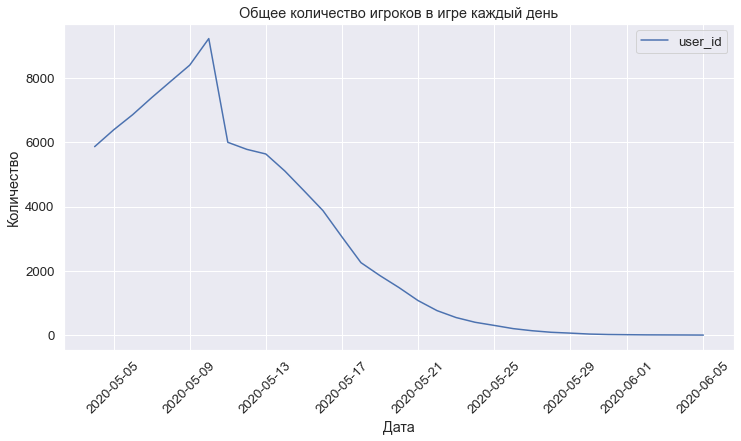

In [19]:
daily_act.plot(x='dt',grid=True, legend=True, figsize=(12, 6), rot=45)
plt.title('Общее количество игроков в игре каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

На графике заметен рост активности пользователей  до 10 мая, а затем резкое снижение ежедневного количества действий пользователей до показателей первого дня. 


В отсутствие иных факторов самым очевидным является то, что в данном исследовании мы анализируем действия только одной когорты игроков, поэтому активность тех, кто присоединился к игре после 11 мая, на графике выше не учтена. Дальше мы разберемся, почему после 5-7 дней пользования игрой, игроки стали совершать меньше действий.

<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Согласна с тобой. Действительно наблюдается спад активности после 10 мая, может, это связано с праздниками, а может, нет</div>

### Посчитаем, сколько пользователей совершали каждое из событий игры. Отсортируем события по числу пользователей.

In [20]:
events = (game_actions.groupby('event')
          .agg({'user_id':'count'})
          .sort_values(by='user_id', ascending = False)
          .reset_index())
events

,event,user_id
0,building,127956
1,finished_stage_1,5817
2,project,1866


In [21]:
game_actions['user_id'].nunique()

13576

Наибольшее число событий относится на постройку сооружений  - за 32 дня 13576 пользователя построили 127 956 сооружений (включая проекты). Количество событий - завершение проекта и прохождение уровня - совпадает с нашими расчетами выше. 

Между тем, стоит учесть, что проект - это тоже постройка, то целевое событие ожидает игроков как перед постройкой обычного сооружения, так и перед выполнением проекта.

<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Все верно и логично, для прохождения уровня нужно построить здания, сборочные цеха и исследовательские центры.</div>

### Определим среднее количество событий за каждый день. Определим количество построек в день/среднее количество построек в день. Построим гистограмму динамики по дням.


In [22]:
daily_event = game_actions.groupby(['dt', 'event']).agg({'user_id':'count'}).reset_index()
daily_event.head(5)

,dt,event,user_id
0,2020-05-04,building,8170
1,2020-05-04,finished_stage_1,1
2,2020-05-05,building,9052
3,2020-05-05,finished_stage_1,3
4,2020-05-06,building,9921


In [23]:
print('Первое прохождение уровня', daily_event[daily_event['event'] == 'finished_stage_1'].min())
print('----------------------------')
print('Первый проект', daily_event[daily_event['event'] == 'project'].min())

Первое прохождение уровня dt               2020-05-04
event      finished_stage_1
user_id                   1
dtype: object
----------------------------
Первый проект dt         2020-05-08
event         project
user_id             1
dtype: object


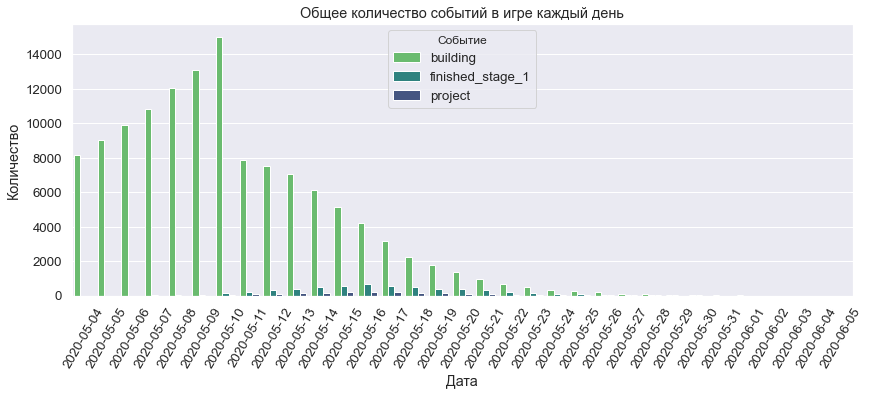

In [24]:
plt.figure(figsize=(14, 5))
sns.barplot(data = daily_event,x = 'dt', y= 'user_id', hue='event',  palette = 'viridis_r')
plt.title('Общее количество событий в игре каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend(title='Событие', title_fontsize='12')
plt.xticks(rotation=60);

Первую неделю игры пользователи предпочитали только сооружать новые постройки. Хотя один из пользователей прошел первый уровень в первый же день. 

Построим аналогичный график без учета построек зданий вне проекта.

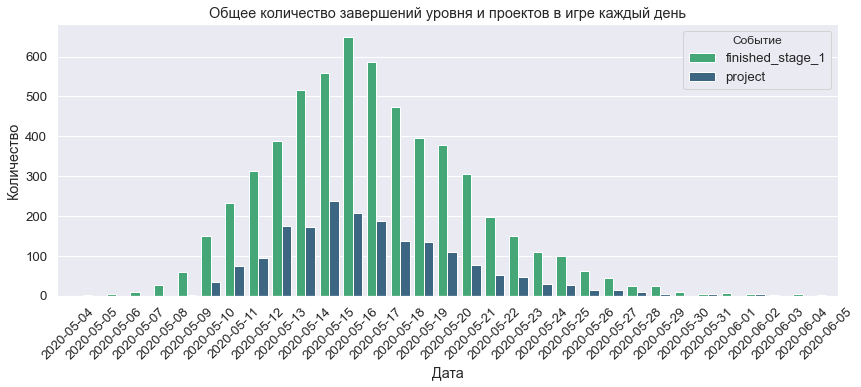

In [25]:
plt.figure(figsize=(14, 5))
sns.barplot(data = daily_event[daily_event['event'] !='building'],x = 'dt', y= 'user_id', 
            hue='event',  palette = 'viridis_r')
plt.title('Общее количество завершений уровня и проектов в игре каждый день')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.legend(title='Событие', title_fontsize='12')
plt.xticks(rotation=45);

К выполнению проекта игроки начали приступать только с 8го мая, но в незначительном количестве - на графике это явным образом видно не ранее 10го мая.

В целом, прохождение 1-го уровня через победу соперника, а не через выполнение проекта более популярно среди игроков "Космических братьев".

<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Отлично, что ты построила второй график без учета building. На первом графике динамику finished_stage_1 и project совсем не видно, а на этом очень хорошо и наглядно:)</div>

### Посчитаем медианное, среднее и максимальное значение количества построек в день на одного пользователя.

Так как предполагается, что  целевое действие - клик по рекламному объявлению - игроки должны будут произвести на этапе выбора объекта строительства, количество построек будет означать количество раз, когда игрок зашел на страницу выбора типа сооружения.

In [26]:
filtered_game = game_actions[game_actions['event'] != "finished_stage_1"]
groupped_game = filtered_game.groupby(['dt', 'user_id']).agg({'event':'count'}).reset_index()
evens_per_day = groupped_game.groupby('dt').agg({'event':'mean'}).reset_index()
evens_per_day['event'] = evens_per_day['event'].astype('float')
print('Mедианное количество событий в день на одного игрока:', round(evens_per_day['event'].median(),2))
print('Среднее количество событий в день на одного игрока:', round(evens_per_day['event'].mean(),2))
print('Максимальное количество событий в день на одного игрока:', round(evens_per_day['event'].min(),2))

Mедианное количество событий в день на одного игрока: 1.18
Среднее количество событий в день на одного игрока: 1.24
Максимальное количество событий в день на одного игрока: 1.0


Совпадение масштаба и изменений двух графиков выше по количеству пользователей и количества событий подтверждается нашим расчетом - в среднем пользователи за один день проходили только одно событие на первом уровне, и, значит, не более одного раза в день совершали выбор сооружаемого объекта.

<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>Не очень поняла, что значит "целевого события - выбор типа сооружения"?</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила мысль </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Отлично:)</div>


### Рассмотрим динамику активности игроков по типам объектов

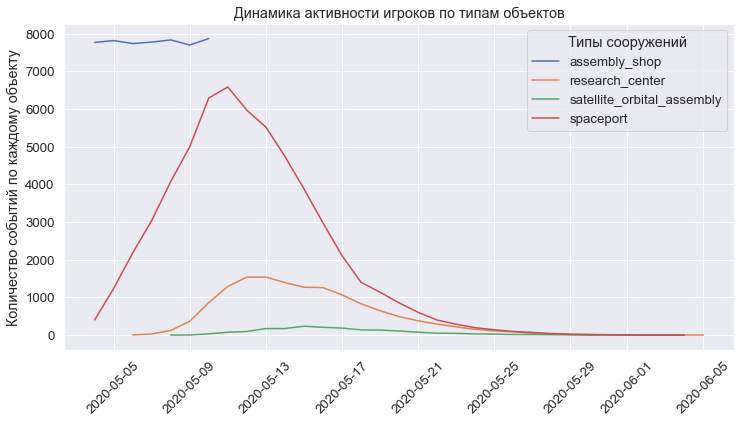

In [27]:
game_actions.pivot_table(index='dt', 
                         columns='building_type', 
                         values='user_id',
                         aggfunc='count').reset_index().plot(x='dt',
                                                             grid=True, 
                                                             legend=True, 
                                                             figsize=(12, 6), rot = 45)
plt.title('Динамика активности игроков по типам объектов')
plt.xlabel(None)
plt.ylabel('Количество событий по каждому объекту')
plt.legend(title='Типы сооружений') 
plt.show()

В первые дни пользования игрой игроки в основном выбирали `assembly_shop`  - практически 5 дней количество сооружений почти достигало 8 тысяч.


Затем популярность начали набирать `spaceport` и `research_center`. Учитывая уровень популярности `assembly_shop` и внезапное прекращение графика по указанному объекту с окончанием первой недели, можно предположить, что указанный тип постройки является обязательным для новых пользователей. В то же время `assembly_shop` - это сборочный цех, а значит, столько активное сооружение именно этого типа постройки в первые дни игры обусловлено целью игроков упросить и ускорить строительство иных сооружений с помощью цеха.


<div class="alert alert-warning">
<b>Комментарий ревьюера v2.0:</b>Предположение хорошее, его можно проверить даже) вообще assembly_shop - сборочный цех, чем их больше, тем быстрее строятся другие здания. Такое поведение игроков может обуславливаться выбором стратегии</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Спасибо, дополнила мысль </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️+</div>


__Вывод:__

Первую неделю игры пользователи предпочитали только сооружать новые постройки. Во второй половине исследуемого периода совокупная активность игроков снижалась. К выполнению проекта игроки начали приступать только с 8го мая, но в незначительном количестве - на графике это явным образом видно не ранее 10го мая.

Наибольшее число событий относится на постройку сооружений  - за 32 дня пользователи построили 127 956 сооружений (включая проекты). Между тем, в день каждый из пользователей проходил в среднем только одно событие.

В первые дни пользования игрой игроки в основном выбирали `assembly_shop`, затем популярность начали набирать `spaceport` и `research_center`.

## Анализ влияния событий на совершение целевого события

### Сформируем профили пользователей, рассчитаем длительность прохождения уровней и способ прохождения.

Для начала для каждого игрока определим общее количество пройденных этапов и событий, а также статус прохождения/непрохождения уровня.

Для тех игроков, кто прошел уровень победой над соперником, установим статус `pvp` - `player vs player`, а тем, кто прошел уровень выполнением проекта: `pve` - `player vs environment`.

<div class="alert alert-warning">
<b>Комментарий ревьюера v2.0:</b>☀️я думала, что pve - player vs event, но так тоже можно расшифровать ))</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  👍 Гугл сказал про окружение, и я не стала спорить) </div>

In [28]:
actions_count = game_actions.pivot_table(index='user_id', 
                             columns = 'event', 
                             values = 'event_datetime', 
                             aggfunc='nunique',  
                             fill_value=0)
actions_count['finish'] = np.nan
actions_count.loc[actions_count['project']==1, 
                  'finish'] = actions_count.loc[actions_count['project']==1, 
                                                               'finish'].fillna('pve')
actions_count.loc[actions_count['finished_stage_1']==1, 
                  'finish'] = actions_count.loc[actions_count['finished_stage_1']==1, 
                                                               'finish'].fillna('pvp')
actions_count['finish'] = actions_count['finish'].fillna('not finished')
actions_count.head(5)

event,building,finished_stage_1,project,finish
user_id,,,,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,13,0,0,not finished
00151b4f-ba38-44a8-a650-d7cf130a0105,9,0,0,not finished
001aaea6-3d14-43f1-8ca8-7f48820f17aa,4,0,0,not finished
001d39dc-366c-4021-9604-6a3b9ff01e25,8,1,0,pvp
002f508f-67b6-479f-814b-b05f00d4e995,12,0,0,not finished


In [29]:
game_actions = game_actions.merge(actions_count['finish'], on = 'user_id', how='left')
game_actions.sample(3)

,event_datetime,event,building_type,user_id,project_type,dt,source,finish
28296,2020-05-04 11:08:56,building,assembly_shop,6ec52429-001d-4d16-ae1a-7568284ccf23,NaN,2020-05-04,yandex_direct,not finished
2781,2020-05-26 18:34:18,building,spaceport,1618dfc9-0b6d-4295-a6eb-86edd059e91b,NaN,2020-05-26,youtube_channel_reklama,not finished
111758,2020-05-08 17:32:05,building,assembly_shop,eb6f007f-deea-41d1-9cad-fa65b1e1faf6,NaN,2020-05-08,yandex_direct,pve


Определим для каждого пользователя первую и последнюю дату активности, а также длительность прохождения уровня.

In [30]:
duration = game_actions.pivot_table(index ='user_id', values = 'dt', aggfunc = ['first', 'last']).reset_index()
duration.columns = ['user_id', 'first_dt', 'last_dt']
duration['duration'] = (duration['last_dt']-duration['first_dt']).dt.days
game_actions = game_actions.merge(duration, on = 'user_id', how='left')
game_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,dt,source,finish,first_dt,last_dt,duration
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,youtube_channel_reklama,not finished,2020-05-04,2020-05-10,6
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama,not finished,2020-05-04,2020-05-10,6
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,youtube_channel_reklama,not finished,2020-05-04,2020-05-10,6


Сформируем профили пользователей:

In [31]:
profiles = (
    game_actions.sort_values(by=['dt', 'user_id'])
    .groupby('user_id')
    .agg(
        {
            'first_dt': 'first',
            'last_dt':'first',
            'duration':'first',
            'source': 'first',
            'event': 'count',
            'building_type': 'count',
            'finish':'max'
            }
        )
        .rename(columns={'first_dt': 'first_dt',
            'last_dt':'last_dt',
            'duration':'duration',             
            'source': 'source',
            'event': 'event_count',
            'building_type': 'building_count',
            'finish':'finish'})
        .reset_index()
    )

Добавим столбец `result`, содержащий общие сведения о прохождении/непрохождении 1-го уровня вне зависимости от способа.

In [32]:
profiles['result'] = np.nan
profiles.loc[profiles['finish']== 'pvp', 
                  'result'] = profiles.loc[profiles['finish']== 'pvp', 
                  'result'].fillna(1)
profiles.loc[profiles['finish']== 'pve', 
                  'result'] = profiles.loc[profiles['finish']== 'pve', 
                  'result'].fillna(1)
profiles.loc[profiles['finish']=='not finished', 
                  'result'] = profiles.loc[profiles['finish']=='not finished', 
                  'result'].fillna(0)
profiles.head()

,user_id,first_dt,last_dt,duration,source,event_count,building_count,finish,result
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06,2020-05-20,14,facebook_ads,13,13,not finished,0.0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06,2020-05-18,12,yandex_direct,9,9,not finished,0.0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05,2020-05-14,9,youtube_channel_reklama,4,4,not finished,0.0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05,2020-05-12,7,instagram_new_adverts,9,8,pvp,1.0
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05,2020-05-22,17,facebook_ads,12,12,not finished,0.0


### Посмотрим за какое время в среднем игроки завершают первый уровень.  Посмотрим количество событий и построек, включая проект, а также длительность прохождения уровня для каждой категории игроков. 

In [33]:
user_events = game_actions.groupby('user_id').agg({'event':'count'}).sort_values(by='event', ascending = False)
user_events.describe()

,event
count,13576.000000
mean,9.991087
std,4.146133
min,1.000000
25%,6.000000
50%,10.000000
75%,13.000000
max,22.000000


В среднем каждый пользователь за месяц прошел от 5 до 13 событий.


In [34]:
new = profiles.groupby('finish').agg({'duration':['mean', 'median'], 
                                'event_count':['mean', 'median'],
                                'building_count':['mean', 'median']})

new.columns = ['duration_mean', 'duration_med','events_mean',
                    'events_median', 'buildings_mean', 'buildings_median']

new.sort_values(by='duration_mean', ascending=False).reset_index()

,finish,duration_mean,duration_med,events_mean,events_median,buildings_mean,buildings_median
0,pve,13.396570,13,14.647910,14,13.647910,13
1,pvp,11.058466,11,10.411541,11,9.411541,10
2,not finished,9.746230,10,8.657043,8,8.657043,8


Игроки, выбравшие завершение уровня проектом в среднем проходят уровень дольше, однако также строят больше сооружений. 

Построим график распределения, чтобы визуализировать различия между категориями в вышеуказанных параметрах.

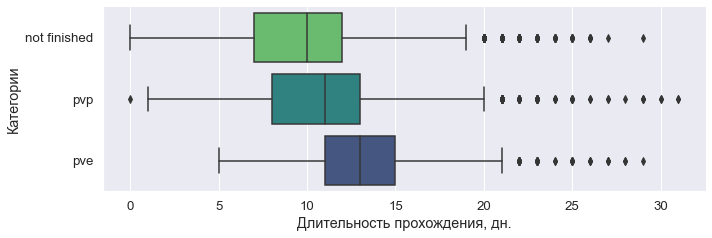

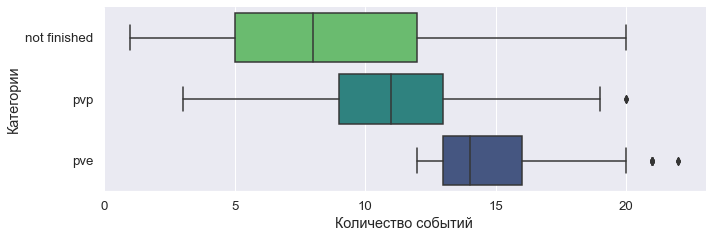

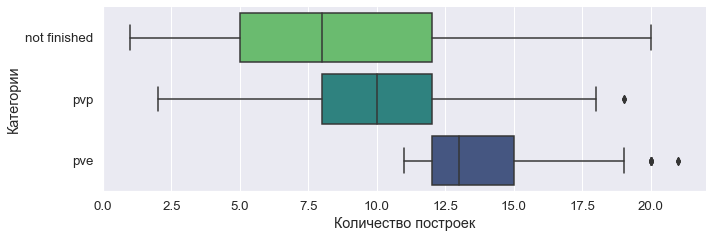

In [35]:
for column in ['duration', 'event_count', 'building_count']: 
    title = {'duration':'Длительность прохождения, дн.', 
         'event_count': 'Количество событий', 
         'building_count':'Количество построек'}
    g = sns.catplot(y='finish', x=column, kind="box", data= profiles, orient='h', palette = 'viridis_r')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(3)
    g.set_axis_labels(title[column], "Категории");

Выводы из графика в целом совпадают с нашими выводами из расчетов. По количеству событий, совершенных за месяц, длительности прохождения и количеству построек игроки `pve` значительно опережают две другие категории.

Однако игроков `pvp` больше по количеству, ввиду чего и разброс значений для них значительно шире. 

Определим соотношение количества игроков каждой категории и суммарное количество построек у них.

### Определим количество игроков, завершивших уровень с помощью завершения проекта или победы над соперником.

In [36]:
categories = profiles.groupby('finish').agg({'user_id':'count'}).sort_values('user_id').reset_index()
categories

,finish,user_id
0,pve,1866
1,pvp,3951
2,not finished,7759


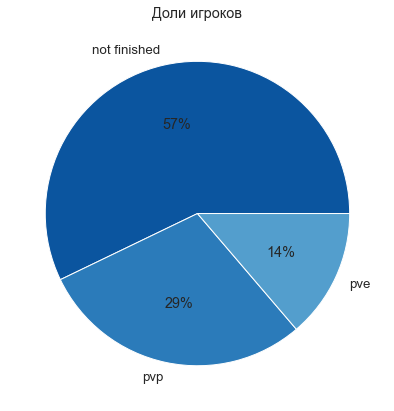

In [37]:
colors = sns.color_palette('Blues_r')
plt.figure(figsize=(7, 7))
plt.pie(data=categories.sort_values(by='user_id', ascending = False), 
        x='user_id', labels = 'finish', colors = colors, autopct='%.0f%%')
plt.title('Доли игроков')
plt.ylabel(None) 
plt.show()

Большинство пользователей  - больше половины - все еще на прошли 1-й уровень. Построим график соотношения игроков `pve` и `pvp`.

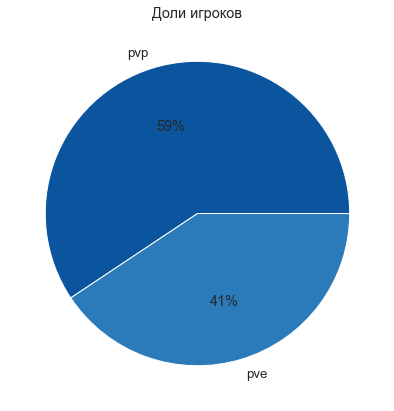

In [38]:
finished = profiles[profiles['finish']!='not finished'].groupby('finish').agg({'building_count':'sum'}).sort_values('building_count').reset_index()
colors = sns.color_palette('Blues_r')
plt.figure(figsize=(7, 7))
plt.pie(data=finished.sort_values(by='building_count', ascending = False), x='building_count', labels = 'finish', colors = colors, autopct='%.0f%%')
plt.title('Доли игроков')
plt.ylabel(None) 
plt.show()

Из тех, кто прошел 1-й уровень, больше половины игроков выбрали стратегию победы над соперником. Их количество может повлиять на суммарное соотношение количества построек по категориям.

Общее количество построек для игроков `pvp` превысило количество сооружений игроков `pve`. 

Следовательно, несмотря на то, что среднее число построек у каждого из игроков `pvp` меньше, чем у игроков `pve`, ввиду превышения количества `pvp` над количеством `pve`, категория `pvp` переходила на страницу с предполагаемой рекламой чаще, чем их оппоненты.

### Определим  количество построек и построим гистрограмму распределения построенных объектов для всех игроков, прошедших уровень, и для продолжающих игроков.

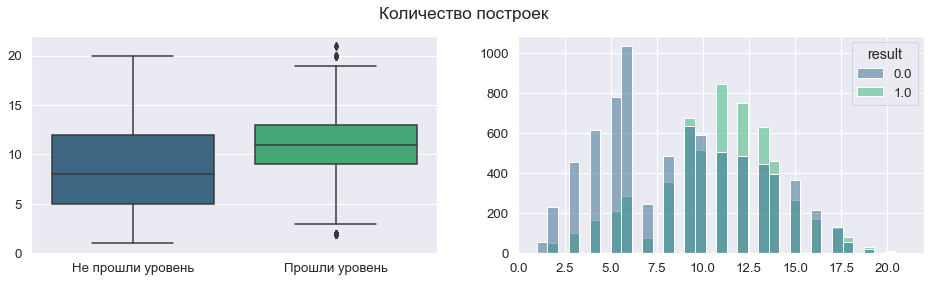

In [39]:
fig, ax = plt.subplots(figsize = (16, 4)) 
sns.boxplot(x = 'result', y = 'building_count', data = profiles, ax = plt.subplot(1,2,1), palette = 'viridis') 
plt.xlabel('')
plt.ylabel('')
plt.xticks(np.arange(2), ('Не прошли уровень', 'Прошли уровень'))

a = profiles.query('result == 1')
b = profiles.query('result == 0') 

sns.histplot(data=profiles, x= 'building_count', hue='result', ax = plt.subplot(1,2,2), palette = 'viridis')
plt.xlabel('')
plt.ylabel('')

fig.suptitle('Количество построек')
plt.show()

Ожидаемо, наибольшее количество объектов за период в среднем успели построиить игроки, прошедшие уровень.  Из распределения видно, что среди игроков, не прошедших уровень, большинство игроков завершили строительство только 6 объектов. У тех, кто прошел уровень, пик приходится на 12 объектов.  

### Посмотрим, через какие каналы привлечены игроки. Посмотрим, есть ли типичные поведенческие паттерны в прохождении уровня у пользователя из разных источников.


In [40]:
sources = game_actions.groupby('source').agg({'user_id':'count'}).sort_values(by='user_id', ascending = False).reset_index()
sources

,source,user_id
0,yandex_direct,47694
1,instagram_new_adverts,33757
2,facebook_ads,27672
3,youtube_channel_reklama,26516


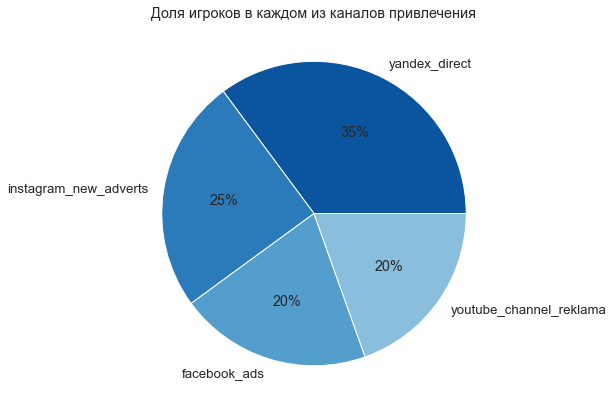

In [41]:
colors = sns.color_palette('Blues_r')
plt.figure(figsize=(7, 7))
plt.pie(data=sources, x='user_id', labels = 'source', colors = colors, autopct='%.0f%%')
plt.title('Доля игроков в каждом из каналов привлечения')
plt.ylabel(None) 
plt.show()

Большинство игроков привлечены через `yandex_direct`, менее всего привлечены из `youtube_channel_reklama`.

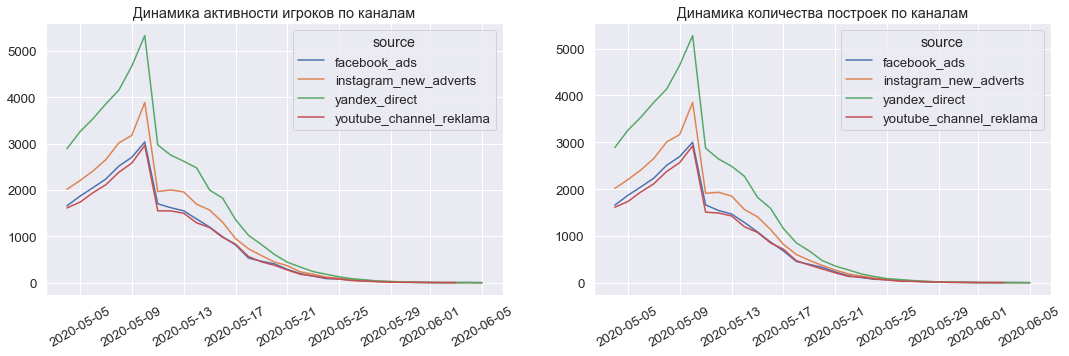

In [42]:
fig, ax = plt.subplots(figsize = (18, 5)) 
game_actions.pivot_table(index='dt', 
                         columns='source',
                         values='user_id',
                         aggfunc='count').reset_index().plot(x='dt',
                                                             grid=True, 
                                                             legend=True, 
                                                             ax = plt.subplot(1, 2, 1), rot = 30)
plt.title('Динамика активности игроков по каналам')
plt.xlabel(None)

game_actions.pivot_table(index='dt', 
                         columns='source', 
                         values='building_type',
                         aggfunc='count').reset_index().plot(x='dt',
                                                             grid=True, 
                                                             legend=True, 
                                                             ax = plt.subplot(1, 2, 2),  rot = 30)
plt.title('Динамика количества построек по каналам')
plt.xlabel(None)
plt.show()

График динамики активности игроков в разбивке по каналам и динамики количества построек в целом совпадают с общими тенденциями. По количеству активных пользователей между каналами сохранена последовательность от большего к меньшему в соответствии с долями каналов в общей массе пользователей.

Из изложенного можно сделать вывод, что нельзя выделить какие-либо различия в динамике активности пользователей, привлеченных из разных источников. 

Построим график распределения, чтобы визуализировать различия между индивидуальными характеристиками пользователей разных каналов привлечения.

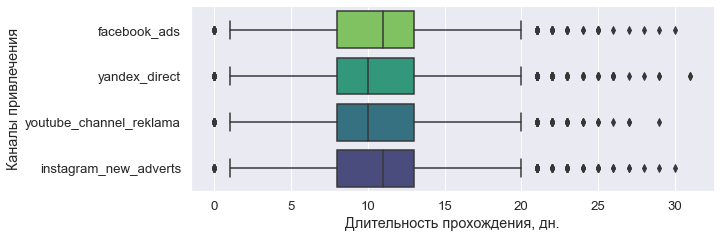

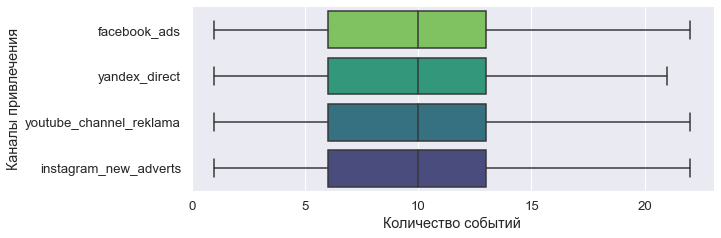

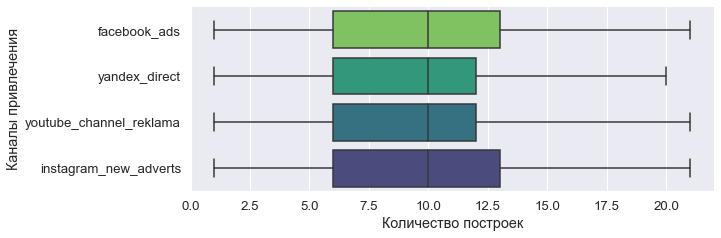

In [43]:
for column in ['duration', 'event_count', 'building_count']: 
    title = {'duration':'Длительность прохождения, дн.', 
         'event_count': 'Количество событий', 
         'building_count':'Количество построек'}
    g = sns.catplot(y='source', x=column, kind="box", data= profiles, orient='h', palette = 'viridis_r')
    g.fig.set_figwidth(16)
    g.fig.set_figheight(3)
    g.set_axis_labels(title[column], "Каналы привлечения");

В среднем длительность прохождения уровня у разных каналов совпадает, однако игроки, пришедшие через `youtube_channel_reklama` склонны тратить меньше времени на 1-м уровне.

В отношении количества построек на игрока следует отметить `yandex_direct` - несмотря на наибольшее количество привлеченных игроков из указанного канала, ширина распределения количества их построек меньше, чем у других каналов.

Лидерами по числу построенных объектов на игрока являются `facebook_ads` и `instagram_new_adverts`, что однако нивелируется малым количеством привлеченных из указанных источников игроков.

### Посчитаем CAC каждого игрока и суммарные затраты на рекламу за каждый день 

В таблице ad_costs сумма затрат отличается в каждом из дней и зависит от количества привлеченных пользователей.

Определим количество пользователей в каждый из дней с 4 по 10 мая, присоединим полученные результаты к таблице  ad_costs и рассчитаем `CAC` для каждого из каналов.

In [44]:
source_users_cnt = profiles.pivot_table(index=['first_dt','source'],values='user_id',aggfunc='count').reset_index()
ad_costs = ad_costs.merge(source_users_cnt,on=['first_dt','source'],how='left')
ad_costs['cac'] = round(ad_costs['cost'] / ad_costs['user_id'],2)
ad_costs.head()

,source,first_dt,cost,user_id,cac
0,facebook_ads,2020-05-04,935.882786,1184,0.79
1,facebook_ads,2020-05-05,548.354480,694,0.79
2,facebook_ads,2020-05-06,260.185754,345,0.75
3,facebook_ads,2020-05-07,177.982200,224,0.79
4,facebook_ads,2020-05-08,111.766796,139,0.80


Средняя стоимость привлечения пользователя по каналам:

In [45]:
mean_cost = ad_costs.groupby('source').agg({'cac':'mean'})
mean_cost

,cac
source,
facebook_ads,0.774286
instagram_new_adverts,0.647143
yandex_direct,0.464286
youtube_channel_reklama,0.402857


Наиболее дорогим для привлечения одного игрока каналом является `facebook_ads`, самым дешевым источником трафика - `youtube_channel_reklama`. Вспомним, что при этом `facebook_ads` является третьим по счету каналом по числу привлеченных игроков, уступая `yandex_direct` и `instagram_new_adverts`.

Добавим `CAC` в профили пользователей.

In [46]:
profiles = profiles.merge(ad_costs.loc[:,['source', 'first_dt','cac']], on=['source', 'first_dt'],how='left')

Построим график динамики затрат с разбивкой по каналам.

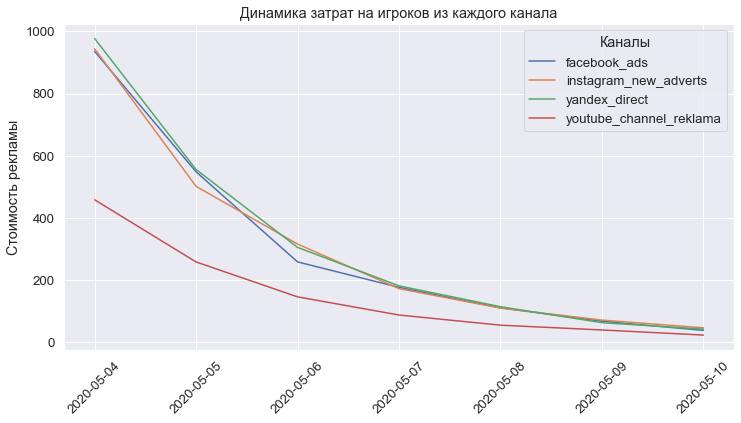

In [47]:
profiles.pivot_table(index='first_dt', 
                     columns='source', 
                     values='cac',
                     aggfunc='sum').reset_index().plot(x='first_dt',
                                                       grid=True, 
                                                       legend=True, 
                                                       figsize=(12, 6), rot = 45)
plt.title('Динамика затрат на игроков из каждого канала')
plt.xlabel(None)
plt.ylabel('Стоимость рекламы')
plt.legend(title='Каналы') 
plt.show()

Из графика видно, что CAC к концу периода падает. При этом, несмотря на низкий средний показатель CAС, график `yandex_direct` не уступает по стоимости `facebook_ads` и `instagram_new_adverts`, снижаясь только к концу периода. Однако количество пользователей и построек среди пользователей, привлеченных через  yandex_direct, как мы уже выяснили, значительно выше оппонентов. 

### Посчитаем возможные доходы от игровой активности при стоимости одного клика по рекламе - 7 центов (0.07).

In [48]:
daily_profit = profiles.groupby('first_dt').agg({'building_count':'sum', 'cac':'sum'}).reset_index()
daily_profit['building_count'] = daily_profit['building_count']*0.07
daily_profit=daily_profit.rename(columns={'building_count':'profit'})
daily_profit

,first_dt,profit,cac
0,2020-05-04,4308.92,3314.22
1,2020-05-05,2327.01,1863.99
2,2020-05-06,1163.96,1026.83
3,2020-05-07,631.19,619.46
4,2020-05-08,342.02,391.52
5,2020-05-09,202.37,243.08
6,2020-05-10,112.07,151.78


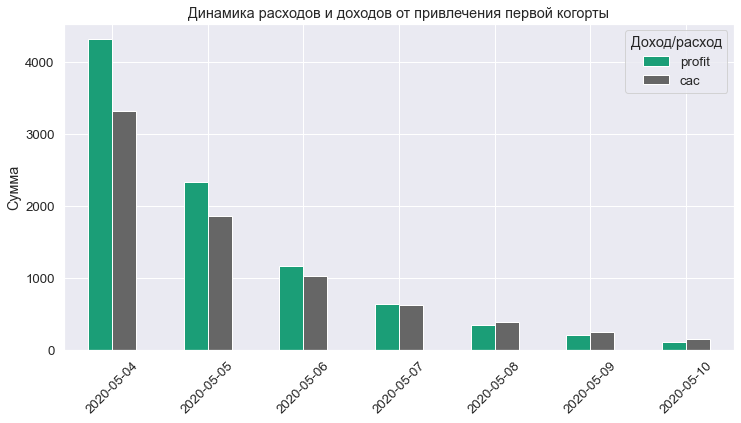

In [49]:
daily_profit.plot(x='first_dt',grid=True, kind='bar', legend=True, figsize=(12, 6), cmap='Dark2', rot = 45)
plt.title('Динамика расходов и доходов от привлечения первой когорты')
plt.xlabel(None)
plt.ylabel('Сумма')
plt.legend(title='Доход/расход') 
plt.show()

В целом, в ситуации, когда каждый игрок будет ежедневно переходить по ссылке в рекламном объявлении каждый раз, когда он будет приступать к выбору типа сооружения (напомним, что это в среднем 1 раз в день для каждого игрока), первые 4 дня реклама по всем источникам в совокупности  будет окупаться. Затем расходы на привлечение начинают превышать стоимость игроков - вероятно это связано с их переходом на другой уровень.

На данном этапе становится заметно, что показывать рекламу на этапе выбора сооружения - эффективная тактика в случае, если рекламный баннер будет размещаться при каждом переходе на страницу с выбором типа объекта постройки. С учетом того, что игрок будет видеть рекламу только 1 раз в день, маловероятно, что такая реклама будет отталкивающей.

Посчитаем и визуализируем доход/расход с каждого пользователя в разбивке по каналам привлечения.


In [50]:
source_profit = profiles.groupby(['first_dt','source']).agg({'building_count':'sum', 'cac':'sum'}).reset_index()
source_profit['building_count'] = source_profit['building_count']*0.07
source_profit=source_profit.rename(columns={'building_count':'profit'})
source_profit.head()

,first_dt,source,profit,cac
0,2020-05-04,facebook_ads,888.37,935.36
1,2020-05-04,instagram_new_adverts,1076.88,943.80
2,2020-05-04,yandex_direct,1506.33,976.66
3,2020-05-04,youtube_channel_reklama,837.34,458.40
4,2020-05-05,facebook_ads,489.93,548.26


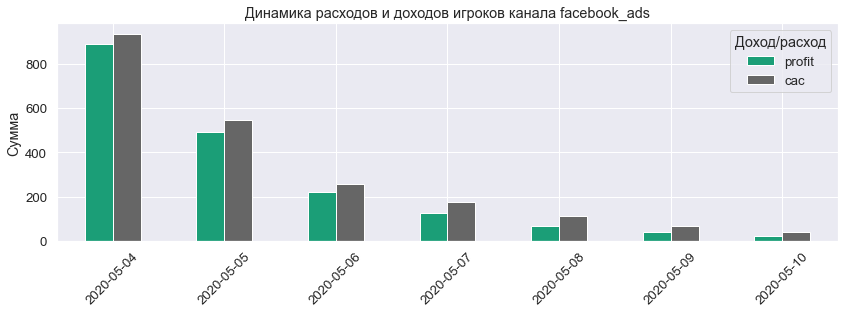

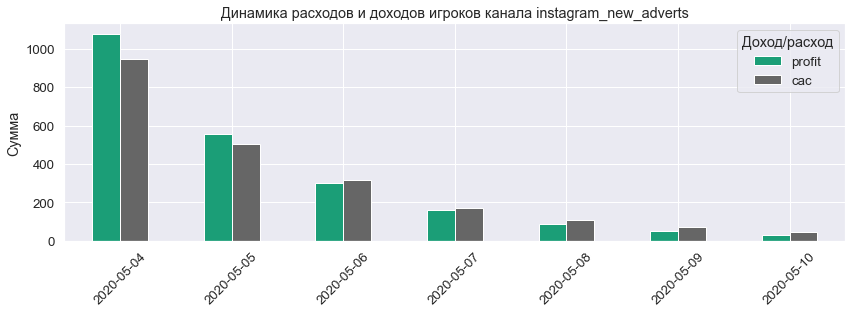

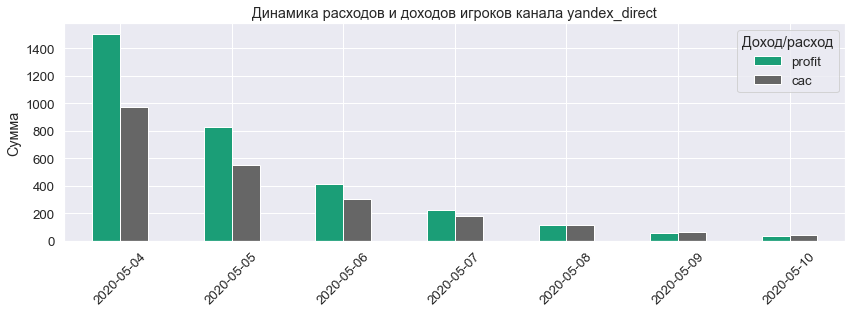

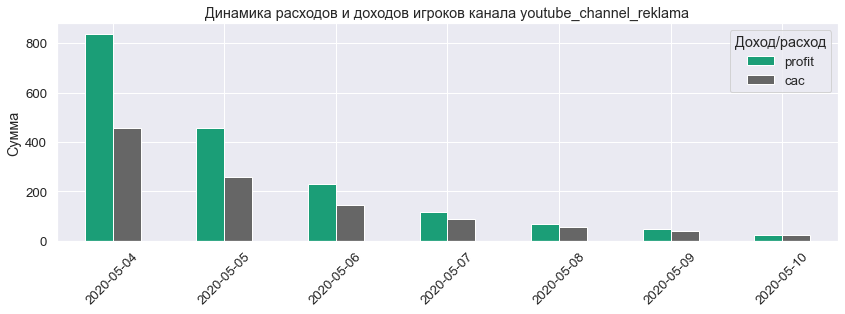

In [51]:
for vol in ['facebook_ads', 'instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']:  
    source_profit[source_profit['source'] == vol].plot(x='first_dt',grid=True, 
                                     kind='bar', legend=True, 
                                     figsize=(14, 4), cmap='Dark2', 
                                     rot = 45)
    plt.title('Динамика расходов и доходов игроков канала {}'.format(vol))
    plt.xlabel(None)
    plt.ylabel('Сумма')
    plt.legend(title='Доход/расход') 
    plt.show()

Согласно нашим расчетам совершенно не будет окупаться рекламная кампания в `facebook_ads`, при этом и количество пользователей, привлеченных из указанного источника, минимально. 

С 3-го дня не окупаются расходы на `instagram_new_adverts`. Высокой окупаемостью обладают `yandex_direct` и  `youtube_channel_reklama`. Однако стоит помнить, что  `yandex_direct` - лидер по количеству привлеченных пользователей, а `youtube_channel_reklama` - на последнем месте по данному показателю.

Мы предположили, что реклама должна быть размещена на странице выбора типа сооружения каждый раз, когда пользователь заходит на указанную страницу. Учитывая риски оттока игроков, недовольных навязчивой рекламой, рассчитаем возможный доход от размещения рекламы, если объявление будет появляться со 2-й постройки.

Для начала определим доход от первых построек каждого игрока когорты.

In [52]:
first_type = game_actions.groupby(['first_dt','user_id']).agg({'building_type':'first'}).reset_index()
firsts = first_type.groupby(['first_dt']).agg({'building_type':'count'}).reset_index()
firsts = firsts.rename(columns={'building_type':'first_building'})
firsts['first_building'] = firsts['first_building']*0.07
firsts.head()

,first_dt,first_building
0,2020-05-04,410.20
1,2020-05-05,235.27
2,2020-05-06,129.29
3,2020-05-07,77.63
4,2020-05-08,48.16


Присоединим полученные значения к таблицы с ежедневными доходами и расходами на привлечение игроков и скорректируем значение дохода, вычтя из него возможный доход от кликов при постройке каждого первого сооружения.

In [53]:
daily_profit = daily_profit.merge(firsts, on='first_dt', how='left')
daily_profit['profit'] = daily_profit['profit'] - daily_profit['first_building']
daily_profit.head()

,first_dt,profit,cac,first_building
0,2020-05-04,3898.72,3314.22,410.20
1,2020-05-05,2091.74,1863.99,235.27
2,2020-05-06,1034.67,1026.83,129.29
3,2020-05-07,553.56,619.46,77.63
4,2020-05-08,293.86,391.52,48.16


Построим еще один график с визуализацией результатов:

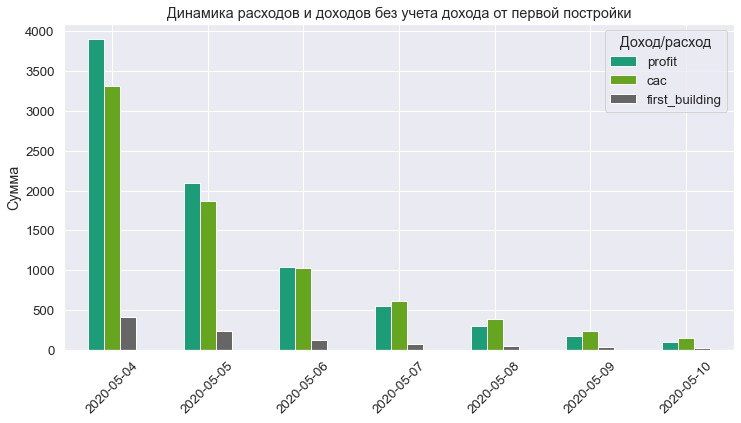

In [54]:
daily_profit.plot(x='first_dt',grid=True, kind='bar', legend=True, figsize=(12, 6), cmap='Dark2', rot = 45)
plt.title('Динамика расходов и доходов без учета дохода от первой постройки')
plt.xlabel(None)
plt.ylabel('Сумма')
plt.legend(title='Доход/расход') 
plt.show()

На первоначальном графике динамики расходов и доходов от привлечения первой когорты, реклама переставала окупаться только на 5й день. После сокращения показа рекламы для каждой первой постройки, расходы на привлечение перестали покрываться уже на 4й день когорты. 

Значит, даже при сохранении уровня активности пользователей и при условии, что каждый просмотр рекламного объявления будет заканчиваться кликом по нему, расходы на привлечение этих игроков могут не окупиться. А сокращение показа рекламы для первых построек только усугубят ситуацию, увеличив расзрыв между доходами и расходами на рекламу.

## Проверим статистические гипотезы

Теперь проверим гипотезы о наличии/отсутствии различий между временем прохождения и количеством построенных объектов у  пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком.

Пороговое значение alpha зададим равным 0.05. Для проверки гипотез мы будем использовать t-тест, и учтем, что выборки не равны, указав equal_var = False.

Так как выборки независимы, применим метод st.ttest_ind.

__Нулевая гипотеза:__ Статистически значимых различий между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, нет.

__Альтернативная гипотеза:__ Статистически значимые различия между временем прохождения уровня у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, есть.


In [55]:
data1 = profiles[profiles['finish'] == 'pve']['duration']
data2  = profiles[profiles['finish'] == 'pvp']['duration']

alpha = .05 

results = st.ttest_ind(
    data1, 
    data2,
    equal_var = False)

print('Разница в среднем времени прохождения уровня у pve и pvp:', 
      profiles[profiles['finish'] == 'pve']['duration'].mean()-profiles[profiles['finish'] == 'pvp']['duration'].mean())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Разница в среднем времени прохождения уровня у pve и pvp: 2.3381039925583575
p-значение: 6.570466755643636e-105
Отвергаем нулевую гипотезу


__Вывод__
Мы отвергли первую нулевую гипотезу. Значит, различие в 2.33 дня между временем прохождения уровня у игроков `pve` и `pvp` является статистически значимым.

__Нулевая гипотеза:__ Статистически значимых различий между  количеством построенных объектов у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, нет.

__Альтернативная гипотеза:__ Статистически значимые различия между количеством построенных объектов  у пользователей, которые заканчивают уровень через реализацию проекта, и пользователей, которые заканчивают уровень победой над другим игроком, есть.


In [56]:
data1 = profiles[profiles['finish'] == 'pve']['building_count']
data2  = profiles[profiles['finish'] == 'pvp']['building_count']

alpha = .05

results = st.ttest_ind(
    data1, 
    data2,
    equal_var = False)

print('Разница в среднем времени прохождения уровня у pve и pvp:', 
      profiles[profiles['finish'] == 'pve']['building_count'].mean()-profiles[profiles['finish'] == 'pvp']['building_count'].mean())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Разница в среднем времени прохождения уровня у pve и pvp: 4.236368585917035
p-значение: 0.0
Отвергаем нулевую гипотезу


__Вывод__
Мы отвергли первую нулевую гипотезу. Значит, различие в 4.23  между количествами построенных объектов у игроков`pve` и `pvp` является статистически значимым.

<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>☀️Хорошая практика - обосновывать выбор уровня значимости и критерия проверки</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Добавила </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Да, теперь здесь все отлично</div>


## Выводы и рекомендации

> __Мы провели подготовку данных к исследованию, изучили их содержание и добавили в основной датафрейм необходимые нам столбцы.__

Мы определили, что проекты -  `satellite_orbital_assembly` - это также тип постройки.  Поэтому, проводя анализ влияния различных параметров на участие игроков в целевом событии - выборе типа постройки, мы связали выполнение игроками целевого события с количеством построенных ими объектов, в числе которых учитывали также выполнение ими проекты.

> __В ходе исследовательского анализа мы сделали следующие выводы.__

- Первую неделю игры пользователи предпочитали только сооружать новые постройки. К выполнению проекта игроки начали приступать только с 8го мая.

- За 32 дня пользователи построили 127 956 сооружений (включая проекты).

- Однако ввиду большого количество пользователей в когорте (около 13,5 тыс.) в день каждый из пользователей проходил в среднем только одно событие, и, значит, количество целевых событий для каждого игрока в день почти никогда не превышает отметку 1.

- В первые дни пользования игрой игроки в основном выбирали `assembly_shop`, затем популярность начали набирать `spaceport` и `research_center`. Учитывая уровень популярности `assembly_shop` и внезапное прекращение графика по указанному объекту с окончанием первой недели, можно предположить, что указанный тип постройки являлся обязательным для новых пользователей. 

> __Мы сформировали пользовательские профили и проверили уровень влияния различных параметров на совершение целевого события.__

-  Мы определии общее количество пройденных этапов и событий, а также статус прохождения/непрохождения уровня. Для тех игроков, кто прошел уровень победой над соперником, установим статус `pvp` - `player vs player`, а тем, кто прошел уровень выполнением проекта: `pve` - `player vs environment`.


- По количеству событий, совершенных за месяц, длительности прохождения и количеству построек на одного игрока игроки `pve` значительно опережают две другие категории.

- Однако игроков `pvp` больше по количеству, ввиду чего суммарное количество построек для игроков `pvp` превысило количество сооружений игроков `pve`. Следовательно, несмотря на то, что среднее число построек у каждого из игроков `pvp` меньше, чем у игроков `pve`, ввиду превышения количества `pvp` над количеством `pve`, категория `pvp` достигала целевого события чаще, чем их оппоненты.

- Большинство игроков когорты привлечены через `yandex_direct`, менее всего привлечены из `youtube_channel_reklama`. По количеству активных пользователей между каналами сохранена последовательность от большего к меньшему в соответствии с долями каналов в общей массе пользователей.

- В среднем длительность прохождения уровня у разных каналов совпадает, однако игроки, пришедшие через `youtube_channel_reklama` склонны тратить меньше времени на 1-м уровне. Лидерами по числу построенных объектов на игрока являются `facebook_ads` и `instagram_new_adverts`.

- Совершенно не будет окупаться рекламная кампания в `facebook_ads`, при этом и количество пользователей, привлеченных из указанного источника, минимально.  С 3-го дня не окупаются расходы на `instagram_new_adverts`. Высокой окупаемостью обладают `yandex_direct` и  `youtube_channel_reklama`. Однако стоит помнить, что  `yandex_direct` - лидер по количеству привлеченных пользователей, а `youtube_channel_reklama` - на последнем месте по данному показателю.

- В целом, в ситуации, когда каждый игрок будет ежедневно переходить по ссылке в рекламном объявлении каждый раз, когда он будет приступать к выбору типа сооружения (напомним, что это в среднем 1 раз в день для каждого игрока), первые 4 дня реклама по всем источникам в совокупности  будет окупаться. Затем расходы на привлечение начинают превышать стоимость игроков - вероятно это связано с их переходом на другой уровень.

- На первоначальном графике динамики расходов и доходов от привлечения первой когорты, реклама переставала окупаться только на 5й день. После сокращения показа рекламы для каждой первой постройки, расходы на привлечение перестали покрываться уже на 4й день когорты. 

Значит, даже при сохранении уровня активности пользователей и при условии, что каждый просмотр рекламного объявления будет заканчиваться кликом по нему, расходы на привлечение этих игроков могут не окупиться. А сокращение показа рекламыдля первых построек только усугубят ситуацию, увеличив расзрыв между доходами и расходами на рекламу.


>__Мы проверили статистические гипотезы__

- Определили, что различие в длительности прохождения первого уровня игры, равное 2.33 дням, у игроков `pve` и `pvp` является статистически значимым.

- Определили, что различие в количестве построенных объектов,равное 4.23, у игроков `pve` и `pvp` является статистически значимым.

Следовательно, игроки `pve` в целом значительно дольше остаются на 1-м уровне игры и сооружают больше объектов.

> __Рекомендации заказчику.__

- __Сокращение расходов__ -  прежде всего сократить вложения в рекламную кампанию в `facebook_ads`, не привлекающего большое количество активных пользователей и имеющего наиболее высокую цену за привлечение.

- __Увеличение частоты событий, ведущих к целевому__ - клику по рекламному объявлению. Мы выяснили, что у игроков `pve` длительность нахождения на 1м уровне и количество построек значительно выше, чем у игроков, избравших стратегию `pvp`. Между тем, количество игроков `pvp` больше половины из тех, кто завершил уровень. Целесообразно стимулировать игроков к прохождению уровня через выполнение проекта - это приведет к увеличению их времени нахождения на текущем уровне и увеличению количества построек.

- __Размещение рекламы__ - на данном этапе становится заметно, что показывать рекламу на этапе выбора сооружения - эффективная тактика в случае, если рекламный баннер будет размещаться при каждом переходе на страницу с выбором типа объекта постройки. С учетом того, что игрок будет видеть рекламу только 1 раз в день, маловероятно, что такая реклама будет отталкивающей.

- __Не рекомендуется__ каким-либо образом сокращать рекламу, например, не показывать рекламный баннер при выборе первой постройки для каждого игрока. Такое сокращение только усугубит ситуацию и приведет к сокращению дохода в первые - наиболее затратные - дни, увеличив разрыв между доходами от рекламы и расходами на нее.

<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>☀️Проект отличный, видно, что ты приложила много усилий. Но я не увидела расчет общих затрат на маркетинг, а так же САС тоже нужно посчитать, чтобы понять, как именно нам окупить расходы. После какого по счету здания нужно показывать рекламу? - вот на этот вопрос постарайся ответить, пожалуйста. Показывать рекламу с первого объекта пользователю - эта модель, во-первых, явно не окупит расходы. (1 показ на пользователя, привлечение явно дороже чем клик). Во-вторых, рекламная нагрузка с первого же действия в игре - оптимально ли это? Другие мои комментарии ты можешь найти по ходу проекта. Отправляю тебе на доработку и жду на повторную проверку:) У тебя все получится! </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Спасибо за проверку! Затраты и САС добавила, выводы тоже исправила :) </div>